# Problem Solving and Critical Thinking Assignment

# ScaleneWorks: HR analytics

# Problem statement:

ScaleneWorks supports several information technology (IT) companies in India with their talent acquisition. One of the challenge they face is about 30% of the candidates who accept the jobs offers, do not join the company. This lead to huge loss of revenue and time as the companies initiate the recruitment process again to fill the workforce demand. So scaleneWorks want to find out if a model can be build to predict the likelihood of a candidate joining the company. If the likelihood is high, then the company can go ahead and offer the jobs to the candidates.

DataSet Description:

SLNO: Sl number auto increment

Candidate: Reference number; it is a unique to identify the candidate.

DOJextended: Binary variable identifying candidate asked for date of joining extension (yes/no).

Duration to accept the offer: Number of days taken by the candidate to accept the offer (Scale variable).

Notice Period: Notice period to be served in the parting company before candidate can join this company.

Offered band: Band offered to the candidate based on experience, performance in the interview rounds (E0/E1/E2/E3).

Percentage hike expected: Percentage hike expected by the candidate (Scale variable).

Percentage hike offered: Percentage hike offered by the company (Scale variable).

Joining bonus: Binary variable indicating if joining bonus was given or not (yes/no).

Gender: Gender of the candidate (male/female).

Candidate source: Source form which resume of the candidates was obtained (Employee referral/Agency/Direct).

REX (in yrs): Relevant years of experience of the candidate for the position offered.

LOB: Line of business for which offer was rolled out.

Age: Age of the candidate.

Joining location: Company location for which the offer was rolled out for the candidate to join.

Candidate relocation status: Binary Variable indicating whether the candidate has to relocate from one city to another city for joining (yes/no).

HR Status: Final joining status of the candidate (joined/ no joined).

Define any hypothesis if possible.

# Hypothesis:

H1: when the offered compensation is less than the expected compensation.

H2:when candidate has to re-locate from one city to other city.

H3:when candidate move from a higher tier company to a lower tier company .

H4:when candidate moves from a product development company to a service oriented company.

H5:when the hiring is not project specific but general hiring

H6:when there is significant disparity between salary increment vis-a-via per capita income in the city.


# Insight of Data:


Number of attributes: 18

Target attribute: Status

Any missing values: None

# Models
DecisionTreeClasifier and LogisticRegression

# Basic Libraries:

In [1]:
#import the required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import itertools
#Misc to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [2]:
#Read the csv using the pandas to df

sw=pd.read_csv('hr_data.csv')

# Data Quality Check and Descriptive Statistics

In [3]:
#Display first 5 rows
sw.head()

SLNO  Candidate Ref DOJ Extended  Duration to accept offer  Notice period  \
0     1        2110407          Yes                        14             30   
1     2        2112635           No                        18             30   
2     3        2112838           No                         3             45   
3     4        2115021           No                        26             30   
4     5        2115125          Yes                         1            120   

  Offered band  Pecent hike expected in CTC  Percent hike offered in CTC  \
0           E2                       -20.79                        13.16   
1           E2                        50.00                       320.00   
2           E2                        42.84                        42.84   
3           E2                        42.84                        42.84   
4           E2                        42.59                        42.59   

   Percent difference CTC Joining Bonus Candidate relocate actual  Gender  \
0                   42.86            No                        No  Female   
1                  180.00            No                        No    Male   
2                    0.00            No                        No    Male   
3                    0.00            No                        No    Male   
4                    0.00            No                       Yes    Male   

    Candidate Source  Rex in Yrs    LOB Location  Age  Status  
0             Agency           7    ERS    Noida   34  Joined  
1  Employee Referral           8  INFRA  Chennai   34  Joined  
2             Agency           4  INFRA    Noida   27  Joined  
3  Employee Referral           4  INFRA    Noida   34  Joined  
4  Employee Referral           6  INFRA    Noida   34  Joined

In [4]:
#checking shape
sw.shape

(8995, 18)

In [5]:
#checking for nan values
sw.isnull().sum()

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [6]:
#checking the data types of each attribute 
sw.dtypes

SLNO                             int64
Candidate Ref                    int64
DOJ Extended                    object
Duration to accept offer         int64
Notice period                    int64
Offered band                    object
Pecent hike expected in CTC    float64
Percent hike offered in CTC    float64
Percent difference CTC         float64
Joining Bonus                   object
Candidate relocate actual       object
Gender                          object
Candidate Source                object
Rex in Yrs                       int64
LOB                             object
Location                        object
Age                              int64
Status                          object
dtype: object

In [7]:
#describing the data
sw.describe().T

count          mean            std         min  \
SLNO                         8995.0  5.970984e+03    3373.963454        1.00   
Candidate Ref                8995.0  2.843647e+06  486344.774552  2109586.00   
Duration to accept offer     8995.0  2.143446e+01      25.811616        0.00   
Notice period                8995.0  3.929183e+01      22.220239        0.00   
Pecent hike expected in CTC  8995.0  4.386480e+01      29.788975      -68.83   
Percent hike offered in CTC  8995.0  4.065736e+01      36.064060      -60.53   
Percent difference CTC       8995.0 -1.573802e+00      19.610729      -67.27   
Rex in Yrs                   8995.0  4.239022e+00       2.547571        0.00   
Age                          8995.0  2.991317e+01       4.097912       20.00   

                                    25%        50%         75%         max  
SLNO                            3207.50     5976.0     8739.00    12333.00  
Candidate Ref                2386476.00  2807482.0  3300059.50  3836076.00  
Duration to accept offer           3.00       10.0       33.00      224.00  
Notice period                     30.00       30.0       60.00      120.00  
Pecent hike expected in CTC       27.27       40.0       53.85      359.77  
Percent hike offered in CTC       22.09       36.0       50.00      471.43  
Percent difference CTC            -8.33        0.0        0.00      300.00  
Rex in Yrs                         3.00        4.0        6.00       24.00  
Age                               27.00       29.0       34.00       60.00

In [8]:
#display columns
sw.columns

Index(['SLNO', 'Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [9]:
#Renaming the column name 
sw=sw.rename(columns={'SLNO':'slno','Candidate Ref':'candidate_ref',
                      'DOJ Extended':'doj_extended',
                     'Duration to accept offer':'accept_duration_offer',
                     'Notice period':'notice_period','Offered band':'offered_band',
                     'Pecent hike expected in CTC':'percent_hike_expected',
                     'Percent hike offered in CTC':'percent_hike_offerd',
                     'Percent difference CTC':'percent_difference',
                     'Joining Bonus':'joining_bonus',
                      'Candidate relocate actual':'candidate_relocated',
                     'Gender':'gender','Candidate Source':'candidate_source',
                     'Rex in Yrs':'rex','LOB':'lob','Location':'location','Age':'age',
                     'Status':'status'})

In [10]:
#checking renamed columns
sw.columns

Index(['slno', 'candidate_ref', 'doj_extended', 'accept_duration_offer',
       'notice_period', 'offered_band', 'percent_hike_expected',
       'percent_hike_offerd', 'percent_difference', 'joining_bonus',
       'candidate_relocated', 'gender', 'candidate_source', 'rex', 'lob',
       'location', 'age', 'status'],
      dtype='object')

In [11]:
#rearranging columns names
sw=sw[['slno','candidate_ref','accept_duration_offer','notice_period',
       'percent_hike_expected','percent_hike_offerd','percent_difference',
       'rex','age','doj_extended','offered_band','joining_bonus',
       'candidate_relocated','gender','candidate_source','lob','location',
      'status']]

In [12]:
sw.head()

slno  candidate_ref  accept_duration_offer  notice_period  \
0     1        2110407                     14             30   
1     2        2112635                     18             30   
2     3        2112838                      3             45   
3     4        2115021                     26             30   
4     5        2115125                      1            120   

   percent_hike_expected  percent_hike_offerd  percent_difference  rex  age  \
0                 -20.79                13.16               42.86    7   34   
1                  50.00               320.00              180.00    8   34   
2                  42.84                42.84                0.00    4   27   
3                  42.84                42.84                0.00    4   34   
4                  42.59                42.59                0.00    6   34   

  doj_extended offered_band joining_bonus candidate_relocated  gender  \
0          Yes           E2            No                  No  Female   
1           No           E2            No                  No    Male   
2           No           E2            No                  No    Male   
3           No           E2            No                  No    Male   
4          Yes           E2            No                 Yes    Male   

    candidate_source    lob location  status  
0             Agency    ERS    Noida  Joined  
1  Employee Referral  INFRA  Chennai  Joined  
2             Agency  INFRA    Noida  Joined  
3  Employee Referral  INFRA    Noida  Joined  
4  Employee Referral  INFRA    Noida  Joined

Do the EDA of dataset and explain every step and the observation you got form the dataset?

# Exploratory Data Analysis

In [13]:
#copying the sw to sw1 
sw1=sw.copy()

In [14]:
#Dropping slno which is just like an Index
sw1.drop('slno',1,inplace=True)

In [15]:
#Review the first 5 rows
sw1.head()

candidate_ref  accept_duration_offer  notice_period  percent_hike_expected  \
0        2110407                     14             30                 -20.79   
1        2112635                     18             30                  50.00   
2        2112838                      3             45                  42.84   
3        2115021                     26             30                  42.84   
4        2115125                      1            120                  42.59   

   percent_hike_offerd  percent_difference  rex  age doj_extended  \
0                13.16               42.86    7   34          Yes   
1               320.00              180.00    8   34           No   
2                42.84                0.00    4   27           No   
3                42.84                0.00    4   34           No   
4                42.59                0.00    6   34          Yes   

  offered_band joining_bonus candidate_relocated  gender   candidate_source  \
0           E2            No                  No  Female             Agency   
1           E2            No                  No    Male  Employee Referral   
2           E2            No                  No    Male             Agency   
3           E2            No                  No    Male  Employee Referral   
4           E2            No                 Yes    Male  Employee Referral   

     lob location  status  
0    ERS    Noida  Joined  
1  INFRA  Chennai  Joined  
2  INFRA    Noida  Joined  
3  INFRA    Noida  Joined  
4  INFRA    Noida  Joined

In [16]:
sw1.columns

Index(['candidate_ref', 'accept_duration_offer', 'notice_period',
       'percent_hike_expected', 'percent_hike_offerd', 'percent_difference',
       'rex', 'age', 'doj_extended', 'offered_band', 'joining_bonus',
       'candidate_relocated', 'gender', 'candidate_source', 'lob', 'location',
       'status'],
      dtype='object')

In [17]:
#Extracting catgorical varibles
cat = ['doj_extended','offered_band', 'joining_bonus', 'candidate_relocated', 
       'gender','candidate_source', 'lob', 'location', 'status']

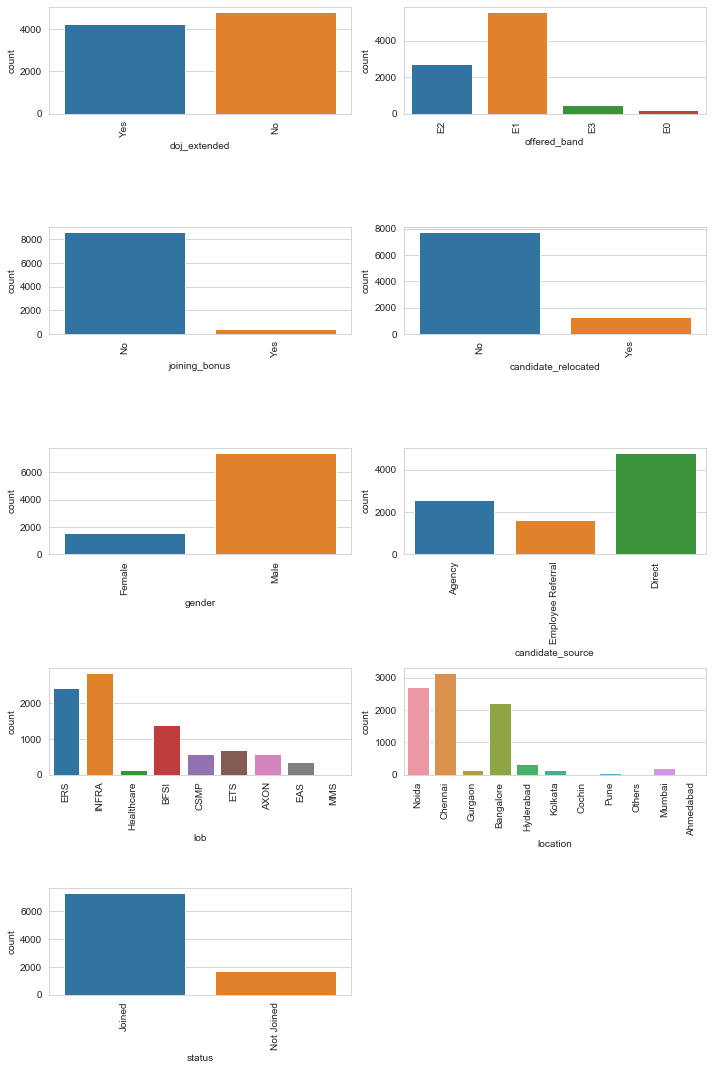

In [18]:
#Count plot for the catgorical varibles
fig=plt.subplots(figsize=(10,15))
length=len(cat)
for i,j in itertools.zip_longest(cat,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = sw1)
    plt.xticks(rotation=90)
    plt.tight_layout()

# Observation from the above Count plots

1.Most of the candidates didn't asked for date of joining extension (DOJ).
2.Band offered to the candidate based on experience, performance 
  in the interview rounds which is E1 in most in number.
3.Most of the candidates has not received any joining bonus.
4.Most of the candidates has not relocated to any new city.
5.Most of the candidates are Males.
6.Most of the resumes obtained are direct and followed by the Agency.
7.Line of business(LOB) for which offer was give is more for INFRA and followed by ERS,BFSI and others.
8.Chennai is the place where most of the candidates got placed later by Noida & Bangalore.
9.Most candidates did Joined the offered job

In [19]:
#Getting in numbers
sw1['status'].value_counts()

Joined        7313
Not Joined    1682
Name: status, dtype: int64

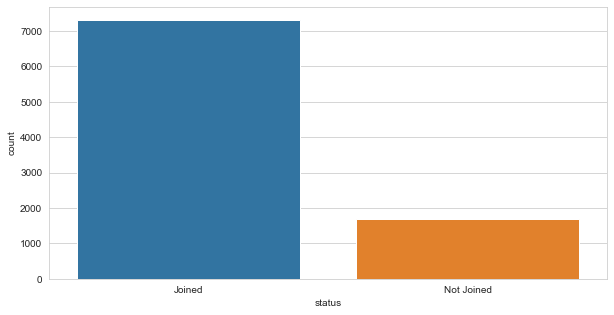

In [20]:
#Count plot for the status variable
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(sw1['status'],ax=ax,)
plt.show()

In [21]:
#Extracting catgorical varibles to cat1
cat1 = ['doj_extended','offered_band', 'joining_bonus', 'candidate_relocated', 
       'gender','candidate_source', 'lob', 'location']

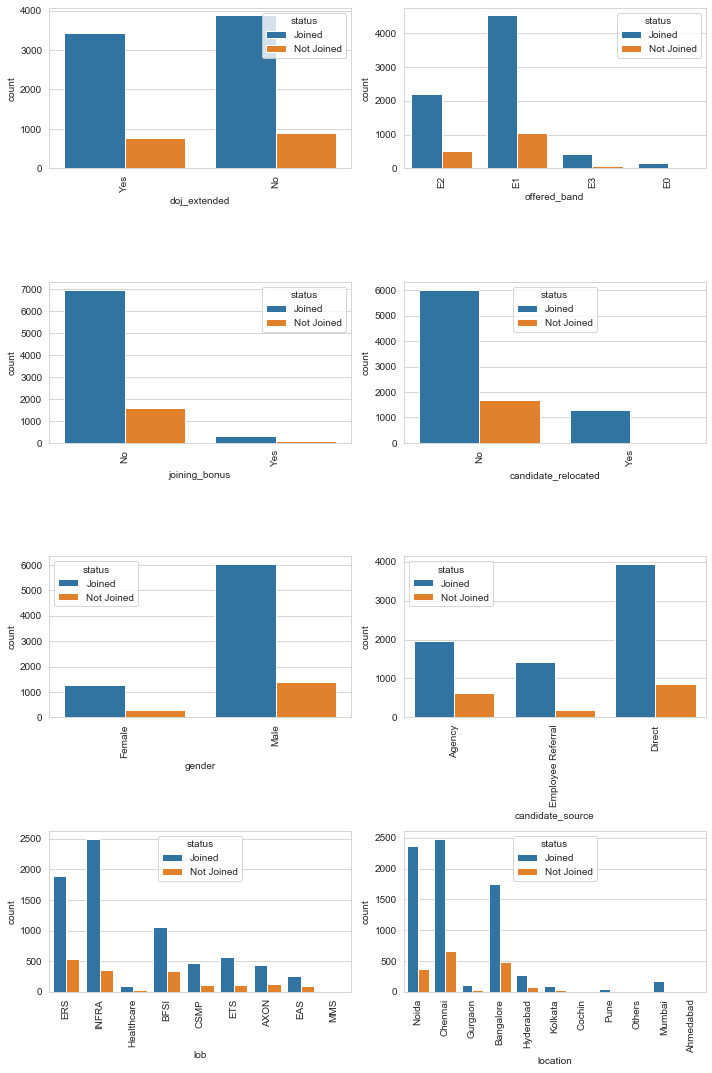

In [22]:

fig=plt.subplots(figsize=(10,15))
length=len(cat1)
for i,j in itertools.zip_longest(cat1,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = sw1,hue='status')
    plt.xticks(rotation=90)
    plt.tight_layout()

From the above observations we can observe most of candidates choose to join the job offered rather than the rejecting it.

In [23]:
#Dropping the "Candidate_ref" because it is just a unique id given to candidate
#like random genrated index ID
sw1.drop('candidate_ref',1,inplace=True)

In [24]:
sw1.corr()

accept_duration_offer  notice_period  \
accept_duration_offer               1.000000       0.363760   
notice_period                       0.363760       1.000000   
percent_hike_expected               0.018821      -0.005262   
percent_hike_offerd                 0.007307      -0.013458   
percent_difference                 -0.009395      -0.015067   
rex                                 0.113951       0.181786   
age                                 0.020131      -0.004967   

                       percent_hike_expected  percent_hike_offerd  \
accept_duration_offer               0.018821             0.007307   
notice_period                      -0.005262            -0.013458   
percent_hike_expected               1.000000             0.668594   
percent_hike_offerd                 0.668594             1.000000   
percent_difference                 -0.161501             0.598779   
rex                                -0.217391            -0.110243   
age                                -0.137705            -0.080010   

                       percent_difference       rex       age  
accept_duration_offer           -0.009395  0.113951  0.020131  
notice_period                   -0.015067  0.181786 -0.004967  
percent_hike_expected           -0.161501 -0.217391 -0.137705  
percent_hike_offerd              0.598779 -0.110243 -0.080010  
percent_difference               1.000000  0.081547  0.037955  
rex                              0.081547  1.000000  0.568228  
age                              0.037955  0.568228  1.000000

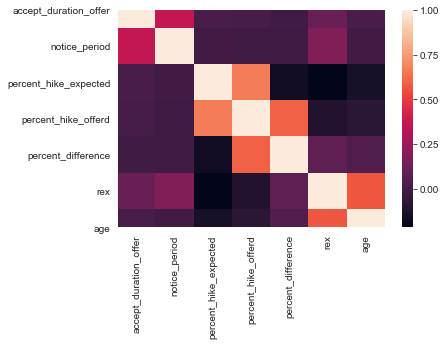

In [25]:
#using Heatmap
corr = sw1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

From the above observations we can see some relationship between the

1.Percent_hike_offered & Percent_hike_excpected

2.Percent_difference & Percent_hike_offered

3.Age & Rex(Relevant years of experience)

In [26]:
sw1.columns

Index(['accept_duration_offer', 'notice_period', 'percent_hike_expected',
       'percent_hike_offerd', 'percent_difference', 'rex', 'age',
       'doj_extended', 'offered_band', 'joining_bonus', 'candidate_relocated',
       'gender', 'candidate_source', 'lob', 'location', 'status'],
      dtype='object')

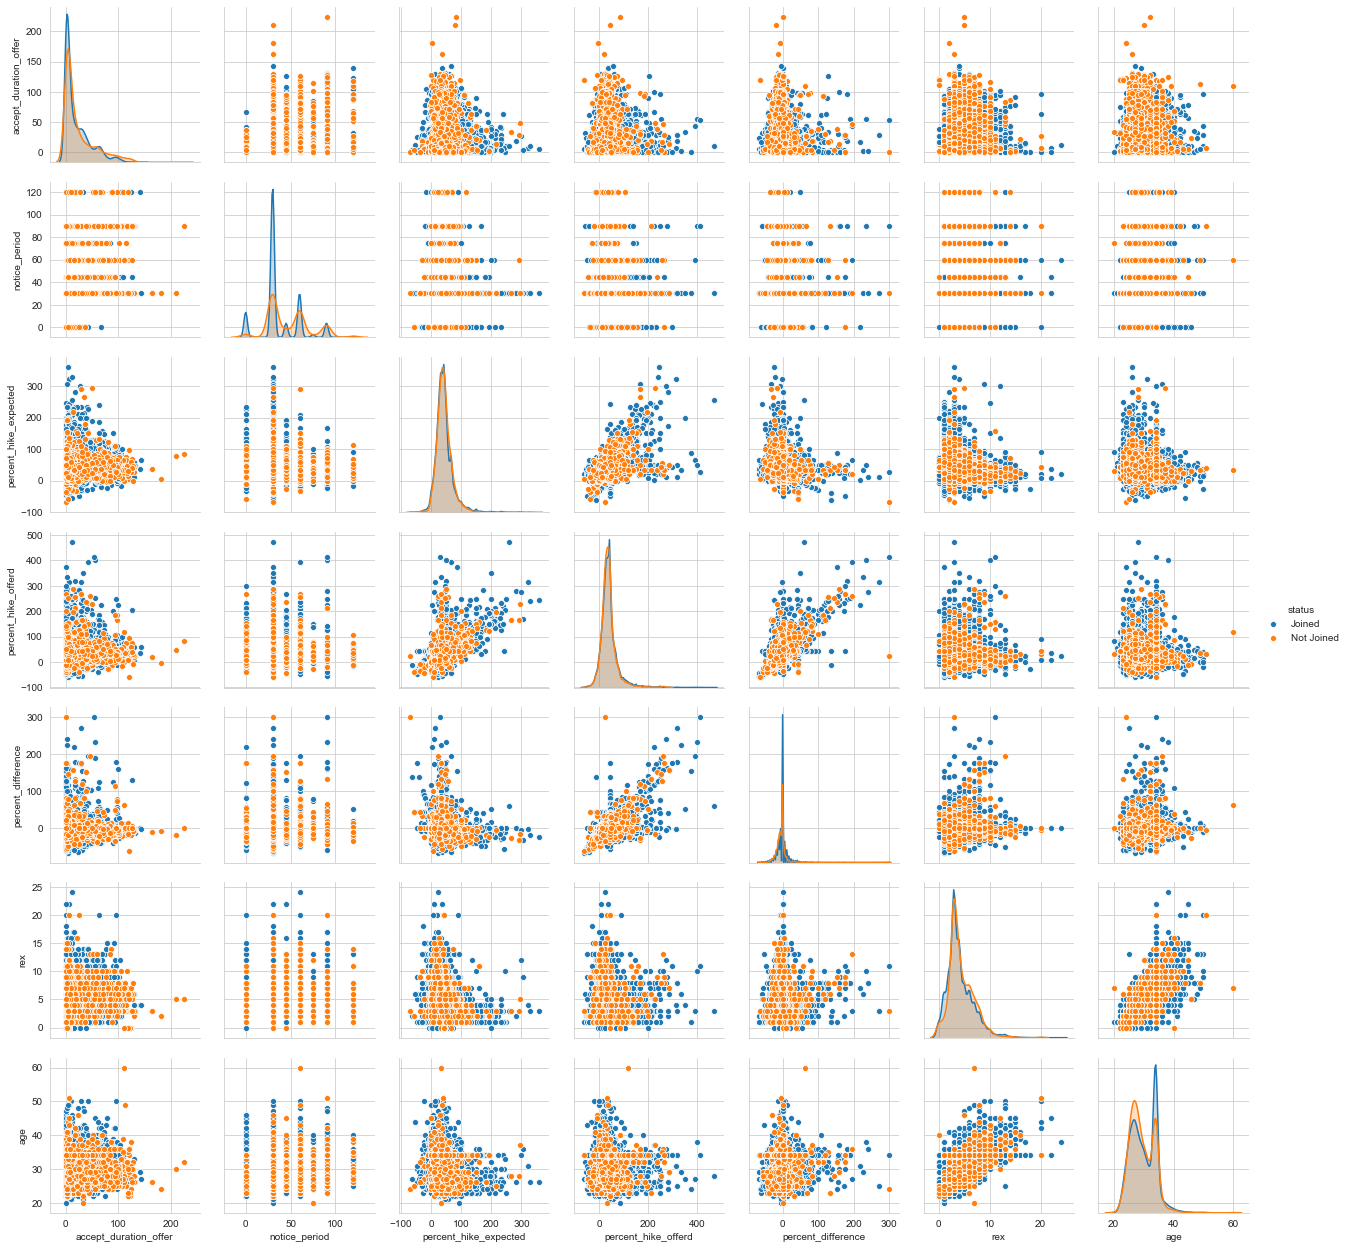

In [27]:
import seaborn as sb # pair plot gives for each=each varaible
sb.pairplot(sw1,hue='status')

From the above pairplot we can clearly see that there correlation between 
percent_hike_expected and percent_hike_offered,
age and rex,
percent_hike_offered and percent_difference

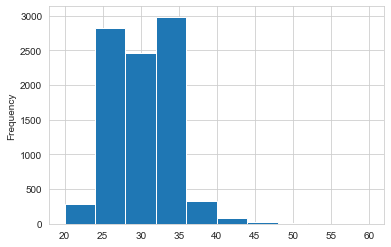

In [28]:
sw1['age'].plot(kind='hist')

From the above histogram most of the candidates are between the age 25-35

# Develop a Machine Learning Algorithm 

# Model1- Decision Tree 

In [29]:
#copying sw to sw2
sw2=sw.copy()

In [30]:
sw2.head()

slno  candidate_ref  accept_duration_offer  notice_period  \
0     1        2110407                     14             30   
1     2        2112635                     18             30   
2     3        2112838                      3             45   
3     4        2115021                     26             30   
4     5        2115125                      1            120   

   percent_hike_expected  percent_hike_offerd  percent_difference  rex  age  \
0                 -20.79                13.16               42.86    7   34   
1                  50.00               320.00              180.00    8   34   
2                  42.84                42.84                0.00    4   27   
3                  42.84                42.84                0.00    4   34   
4                  42.59                42.59                0.00    6   34   

  doj_extended offered_band joining_bonus candidate_relocated  gender  \
0          Yes           E2            No                  No  Female   
1           No           E2            No                  No    Male   
2           No           E2            No                  No    Male   
3           No           E2            No                  No    Male   
4          Yes           E2            No                 Yes    Male   

    candidate_source    lob location  status  
0             Agency    ERS    Noida  Joined  
1  Employee Referral  INFRA  Chennai  Joined  
2             Agency  INFRA    Noida  Joined  
3  Employee Referral  INFRA    Noida  Joined  
4  Employee Referral  INFRA    Noida  Joined

In [31]:
sw2.drop('slno',1,inplace=True)

In [32]:
sw2.head()

candidate_ref  accept_duration_offer  notice_period  percent_hike_expected  \
0        2110407                     14             30                 -20.79   
1        2112635                     18             30                  50.00   
2        2112838                      3             45                  42.84   
3        2115021                     26             30                  42.84   
4        2115125                      1            120                  42.59   

   percent_hike_offerd  percent_difference  rex  age doj_extended  \
0                13.16               42.86    7   34          Yes   
1               320.00              180.00    8   34           No   
2                42.84                0.00    4   27           No   
3                42.84                0.00    4   34           No   
4                42.59                0.00    6   34          Yes   

  offered_band joining_bonus candidate_relocated  gender   candidate_source  \
0           E2            No                  No  Female             Agency   
1           E2            No                  No    Male  Employee Referral   
2           E2            No                  No    Male             Agency   
3           E2            No                  No    Male  Employee Referral   
4           E2            No                 Yes    Male  Employee Referral   

     lob location  status  
0    ERS    Noida  Joined  
1  INFRA  Chennai  Joined  
2  INFRA    Noida  Joined  
3  INFRA    Noida  Joined  
4  INFRA    Noida  Joined

In [33]:
#Dropping the "Candidate_ref" because it is just a unique id given to candidate like random genrated index ID
sw2.drop('candidate_ref',1,inplace=True)

In [34]:
sw2.columns

Index(['accept_duration_offer', 'notice_period', 'percent_hike_expected',
       'percent_hike_offerd', 'percent_difference', 'rex', 'age',
       'doj_extended', 'offered_band', 'joining_bonus', 'candidate_relocated',
       'gender', 'candidate_source', 'lob', 'location', 'status'],
      dtype='object')

In [35]:
sw2.head()

accept_duration_offer  notice_period  percent_hike_expected  \
0                     14             30                 -20.79   
1                     18             30                  50.00   
2                      3             45                  42.84   
3                     26             30                  42.84   
4                      1            120                  42.59   

   percent_hike_offerd  percent_difference  rex  age doj_extended  \
0                13.16               42.86    7   34          Yes   
1               320.00              180.00    8   34           No   
2                42.84                0.00    4   27           No   
3                42.84                0.00    4   34           No   
4                42.59                0.00    6   34          Yes   

  offered_band joining_bonus candidate_relocated  gender   candidate_source  \
0           E2            No                  No  Female             Agency   
1           E2            No                  No    Male  Employee Referral   
2           E2            No                  No    Male             Agency   
3           E2            No                  No    Male  Employee Referral   
4           E2            No                 Yes    Male  Employee Referral   

     lob location  status  
0    ERS    Noida  Joined  
1  INFRA  Chennai  Joined  
2  INFRA    Noida  Joined  
3  INFRA    Noida  Joined  
4  INFRA    Noida  Joined

# Independented Varibales

In [36]:
x = sw2.iloc[:,:-1]
x.head()

accept_duration_offer  notice_period  percent_hike_expected  \
0                     14             30                 -20.79   
1                     18             30                  50.00   
2                      3             45                  42.84   
3                     26             30                  42.84   
4                      1            120                  42.59   

   percent_hike_offerd  percent_difference  rex  age doj_extended  \
0                13.16               42.86    7   34          Yes   
1               320.00              180.00    8   34           No   
2                42.84                0.00    4   27           No   
3                42.84                0.00    4   34           No   
4                42.59                0.00    6   34          Yes   

  offered_band joining_bonus candidate_relocated  gender   candidate_source  \
0           E2            No                  No  Female             Agency   
1           E2            No                  No    Male  Employee Referral   
2           E2            No                  No    Male             Agency   
3           E2            No                  No    Male  Employee Referral   
4           E2            No                 Yes    Male  Employee Referral   

     lob location  
0    ERS    Noida  
1  INFRA  Chennai  
2  INFRA    Noida  
3  INFRA    Noida  
4  INFRA    Noida

# Dependented Varibales

In [37]:
y = sw2.iloc[:,-1]
y.head()

0    Joined
1    Joined
2    Joined
3    Joined
4    Joined
Name: status, dtype: object

In [38]:
#checking unique attributes of status
sw2['status'].unique()

array(['Joined', 'Not Joined'], dtype=object)

In [39]:
#Encoding the dependented variable Joined to '0' Not Joined to '1'
y.replace(['Joined','Not Joined'],[0,1],inplace=True)

In [40]:
x = pd.get_dummies(x,drop_first=True)

In [41]:
x.head()

accept_duration_offer  notice_period  percent_hike_expected  \
0                     14             30                 -20.79   
1                     18             30                  50.00   
2                      3             45                  42.84   
3                     26             30                  42.84   
4                      1            120                  42.59   

   percent_hike_offerd  percent_difference  rex  age  doj_extended_Yes  \
0                13.16               42.86    7   34                 1   
1               320.00              180.00    8   34                 0   
2                42.84                0.00    4   27                 0   
3                42.84                0.00    4   34                 0   
4                42.59                0.00    6   34                 1   

   offered_band_E1  offered_band_E2  ...  location_Bangalore  \
0                0                1  ...                   0   
1                0                1  ...                   0   
2                0                1  ...                   0   
3                0                1  ...                   0   
4                0                1  ...                   0   

   location_Chennai  location_Cochin  location_Gurgaon  location_Hyderabad  \
0                 0                0                 0                   0   
1                 1                0                 0                   0   
2                 0                0                 0                   0   
3                 0                0                 0                   0   
4                 0                0                 0                   0   

   location_Kolkata  location_Mumbai  location_Noida  location_Others  \
0                 0                0               1                0   
1                 0                0               0                0   
2                 0                0               1                0   
3                 0                0               1                0   
4                 0                0               1                0   

   location_Pune  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 34 columns]

# Train and Test the data

In [42]:
import sklearn.model_selection as model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=200)

In [43]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8148971650917176

In [44]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])

0.679018840225104

In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

[Text(697.5, 951.3000000000001, 'candidate_relocated_Yes <= 0.5\ngini = 0.304\nsamples = 7196\nvalue = [5849, 1347]'),
 Text(558.0, 679.5, 'notice_period <= 37.5\ngini = 0.342\nsamples = 6160\nvalue = [4813, 1347]'),
 Text(279.0, 407.70000000000005, 'accept_duration_offer <= 105.5\ngini = 0.268\nsamples = 4017\nvalue = [3376, 641]'),
 Text(139.5, 135.89999999999998, 'gini = 0.261\nsamples = 3989\nvalue = [3374, 615]'),
 Text(418.5, 135.89999999999998, 'gini = 0.133\nsamples = 28\nvalue = [2, 26]'),
 Text(837.0, 407.70000000000005, 'lob_INFRA <= 0.5\ngini = 0.442\nsamples = 2143\nvalue = [1437, 706]'),
 Text(697.5, 135.89999999999998, 'gini = 0.469\nsamples = 1634\nvalue = [1020, 614]'),
 Text(976.5, 135.89999999999998, 'gini = 0.296\nsamples = 509\nvalue = [417, 92]'),
 Text(837.0, 679.5, 'gini = 0.0\nsamples = 1036\nvalue = [1036, 0]')]

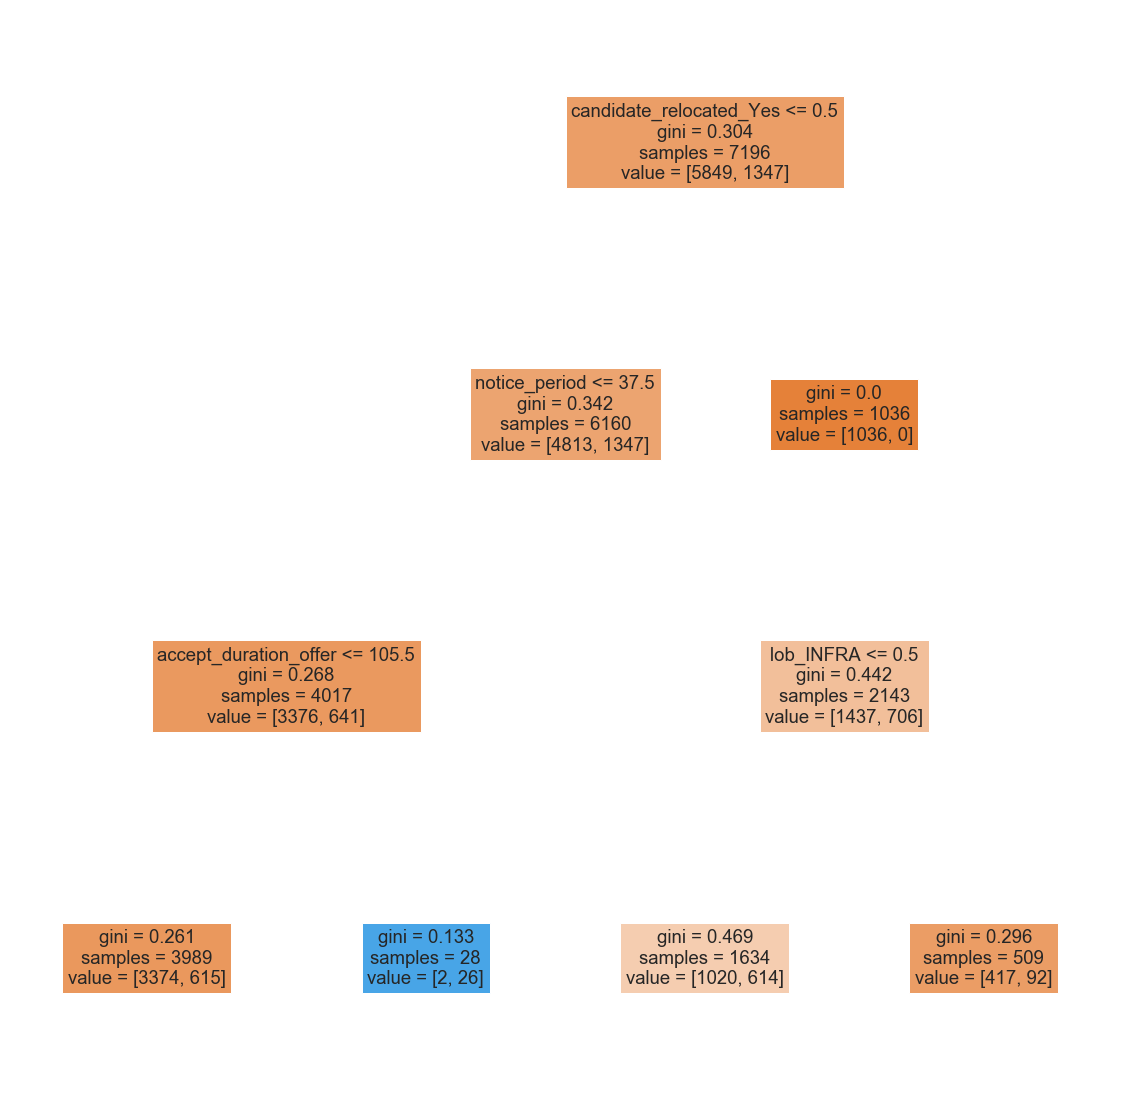

In [46]:
features  = x_test.columns
plt.figure(figsize=(20,20))
plot_tree(clf, feature_names=features,filled = True)

# Grid Search-Cross Validation

In [47]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [48]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=200,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [49]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=200, splitter='best')

In [50]:
mod.best_score_

0.8160088938299055

# Model2:

# Logistic Regression

In [51]:
#reading the data
sw3=pd.read_csv('hr_data.csv')

In [52]:
#Renaming the column name 
sw3=sw3.rename(columns={'SLNO':'slno','Candidate Ref':'candidate_ref',
                      'DOJ Extended':'doj_extended',
                     'Duration to accept offer':'accept_duration_offer',
                     'Notice period':'notice_period','Offered band':'offered_band',
                     'Pecent hike expected in CTC':'percent_hike_expected',
                     'Percent hike offered in CTC':'percent_hike_offerd',
                     'Percent difference CTC':'percent_difference',
                     'Joining Bonus':'joining_bonus',
                      'Candidate relocate actual':'candidate_relocated',
                     'Gender':'gender','Candidate Source':'candidate_source',
                     'Rex in Yrs':'rex','LOB':'lob','Location':'location','Age':'age',
                     'Status':'status'})

In [53]:
#displaying the columns
sw3.columns

Index(['slno', 'candidate_ref', 'doj_extended', 'accept_duration_offer',
       'notice_period', 'offered_band', 'percent_hike_expected',
       'percent_hike_offerd', 'percent_difference', 'joining_bonus',
       'candidate_relocated', 'gender', 'candidate_source', 'rex', 'lob',
       'location', 'age', 'status'],
      dtype='object')

In [54]:
#dropping the slno columns
sw3.drop('slno',1,inplace=True)

In [55]:
#Dropping the "Candidate_ref" because it is just a unique id given to candidate like random genrated index ID
sw3.drop('candidate_ref',1,inplace=True)

# Independented Varibales

In [56]:
x = sw3.iloc[:,:-1]
x.head()

doj_extended  accept_duration_offer  notice_period offered_band  \
0          Yes                     14             30           E2   
1           No                     18             30           E2   
2           No                      3             45           E2   
3           No                     26             30           E2   
4          Yes                      1            120           E2   

   percent_hike_expected  percent_hike_offerd  percent_difference  \
0                 -20.79                13.16               42.86   
1                  50.00               320.00              180.00   
2                  42.84                42.84                0.00   
3                  42.84                42.84                0.00   
4                  42.59                42.59                0.00   

  joining_bonus candidate_relocated  gender   candidate_source  rex    lob  \
0            No                  No  Female             Agency    7    ERS   
1            No                  No    Male  Employee Referral    8  INFRA   
2            No                  No    Male             Agency    4  INFRA   
3            No                  No    Male  Employee Referral    4  INFRA   
4            No                 Yes    Male  Employee Referral    6  INFRA   

  location  age  
0    Noida   34  
1  Chennai   34  
2    Noida   27  
3    Noida   34  
4    Noida   34

# Dependented Varibales

In [57]:
y = sw3.iloc[:,-1]
y.head()

0    Joined
1    Joined
2    Joined
3    Joined
4    Joined
Name: status, dtype: object

In [58]:
#Encoding the dependented variable Joined to '0' Not Joined to '1'
y.replace(['Joined','Not Joined'],[0,1],inplace=True)

# Creating dummies

In [59]:
x = pd.get_dummies(x,drop_first=True)

# Train Data and Test Data

In [60]:
#Importing train & test split
from sklearn.model_selection import train_test_split

In [61]:
#Spliting to train,test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [62]:
#Checking shape of train,test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7196, 34), (1799, 34), (7196,), (1799,))

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logmodel=LogisticRegression()

In [65]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
predictions = logmodel.predict(x_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1479
           1       0.57      0.07      0.13       320

    accuracy                           0.83      1799
   macro avg       0.70      0.53      0.52      1799
weighted avg       0.79      0.83      0.77      1799



In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_test,predictions)

array([[1461,   18],
       [ 296,   24]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test,predictions)

0.8254585881045025

From the above by implementing logistic regression the accuracy check 
between train data and test data the accuracy score we got is 81%

# Conclusion:

The model predicted with 81% accuracy.

From the predictions the likelihood of a candidate joining the company is High

As the likelihood is high company can go ahead and offer the jobs to candidates